In [111]:
import os
from glob import glob
from tqdm import tqdm

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

import sys
sys.path.append('/root/dacon-epitope/dacon-sem')
from src.datasets.sem_dataset import SEMDataset
from src.datasets.sem_datamodule import SEMDataModule

In [6]:
data_path = os.path.abspath('/shared/Samsung/')
simulation_sem_paths = os.path.join(data_path, 'simulation_data', 'SEM', '*', '*', '*.png')
simulation_sem_paths = np.array(sorted(glob(simulation_sem_paths)))
simulation_depth_paths = os.path.join(data_path, 'simulation_data', 'Depth', '*', '*', '*.png')
simulation_depth_paths = np.array(sorted(glob(simulation_depth_paths) + glob(simulation_depth_paths)))
simulation_data_len = len(simulation_sem_paths)

train_sem_paths = os.path.join(data_path, 'train', 'SEM', '*', '*', '*.png')
train_sem_paths = np.array(sorted(glob(train_sem_paths)))
train_data_len = len(train_sem_paths)

test_sem_paths = os.path.join(data_path, 'test', 'SEM', '*.png')
test_sem_paths = np.array(sorted(glob(test_sem_paths)))
test_data_len = len(test_sem_paths)

In [8]:
simulation_data_len, train_data_len, test_data_len

(173304, 60664, 25988)

In [9]:
depth_list = ['Depth_110', 'Depth_120', 'Depth_130', 'Depth_140']
train_sem_by_depths = []

for depth in depth_list:
    t_path = os.path.join(data_path, 'train', 'SEM', depth, '*', '*.png')
    t_path = np.array(sorted(glob(t_path)))
    train_sem_by_depths.append(t_path)

print([len(t_path) for t_path in train_sem_by_depths])

[15166, 15166, 15166, 15166]


In [10]:
print([t_path[0] for t_path in train_sem_by_depths])

['/shared/Samsung/train/SEM/Depth_110/site_00000/SEM_043510.png', '/shared/Samsung/train/SEM/Depth_120/site_00000/SEM_021742.png', '/shared/Samsung/train/SEM/Depth_130/site_00000/SEM_065114.png', '/shared/Samsung/train/SEM/Depth_140/site_00000/SEM_000165.png']


In [11]:
for depth in depth_list:
    print(len(os.listdir(f'/shared/Samsung/train/SEM/{depth}')))

516
515
514
514


## Average Depth

In [82]:
average_depth = pd.read_csv('/shared/Samsung/train/average_depth.csv')
average_depth

,0,1
0,depth_140_site_00233,138.966170
1,depth_140_site_00272,139.588011
2,depth_140_site_00183,137.022387
3,depth_140_site_00204,138.401329
4,depth_140_site_00187,139.402107
...,...,...
2054,depth_130_site_00025,129.598281
2055,depth_130_site_00431,126.778640
2056,depth_130_site_00253,130.063236
2057,depth_130_site_00257,129.374490


In [95]:
average_depth['depth'] = average_depth['0'].apply(lambda x: int(x.split('_')[1]))
average_depth

,0,1,depth
0,depth_140_site_00233,138.966170,140
1,depth_140_site_00272,139.588011,140
2,depth_140_site_00183,137.022387,140
3,depth_140_site_00204,138.401329,140
4,depth_140_site_00187,139.402107,140
...,...,...,...
2054,depth_130_site_00025,129.598281,130
2055,depth_130_site_00431,126.778640,130
2056,depth_130_site_00253,130.063236,130
2057,depth_130_site_00257,129.374490,130


In [102]:
for depth in [140, 130, 120, 110]:
    m = average_depth[average_depth['depth']==depth]['1'].mean()

    print(depth, ':', m)

140 : 138.22027354241257
130 : 128.2240695896887
120 : 118.55704711941762
110 : 108.69768481337212


In [115]:
for case, paths in zip(depth_list, train_sem_by_depths):
    avgs = []
    for path in tqdm(paths):
        depth = cv2.imread(path)
        avg = np.average(depth)
        avgs.append(avg)
    case_avg = np.average(avgs)
    print(case, ":", case_avg)

  0%|          | 66/15166 [00:00<00:23, 656.36it/s]

Case_1 : 118.22702867586366


  0%|          | 63/15166 [00:00<00:24, 627.18it/s]

Case_2 : 116.38813855065669


  1%|▏         | 224/15166 [00:00<00:06, 2157.91it/s]

Case_3 : 114.66024697056281


100%|██████████| 15166/15166 [00:09<00:00, 1594.78it/s]

Case_4 : 113.03569715823893


In [106]:
case_list = ['Case_1', 'Case_2', 'Case_3', 'Case_4']
simulation_depth_by_case = []

for case in case_list:
    t_path = os.path.join(data_path, 'simulation_data', 'Depth', case, '*', '*.png')
    t_path = np.array(sorted(glob(t_path)))
    simulation_depth_by_case.append(t_path)

print([len(t_path) for t_path in simulation_depth_by_case])

[21663, 21663, 21663, 21663]


In [112]:
for case, paths in zip(case_list, simulation_depth_by_case):
    avgs = []
    for path in tqdm(paths):
        depth = cv2.imread(path)
        avg = np.average(depth)
        avgs.append(avg)
    case_avg = np.average(avgs)
    print(case, ":", case_avg)

  0%|          | 24/21663 [00:00<02:18, 156.54it/s]

Case_1 : 101.7664403489864


  0%|          | 64/21663 [00:00<00:34, 627.71it/s]

Case_2 : 108.28920790388032


  0%|          | 6/21663 [00:00<06:14, 57.87it/s]

Case_3 : 114.81366495409051


100%|██████████| 21663/21663 [01:31<00:00, 236.17it/s]

Case_4 : 121.34116433272469


In [114]:
case_list = ['Case_1', 'Case_2', 'Case_3', 'Case_4']
simulation_sem_by_case = []

for case in case_list:
    t_path = os.path.join(data_path, 'simulation_data', 'SEM', case, '*', '*.png')
    t_path = np.array(sorted(glob(t_path)))
    simulation_sem_by_case.append(t_path)

print([len(t_path) for t_path in simulation_sem_by_case])

for case, paths in zip(case_list, simulation_sem_by_case):
    avgs = []
    for path in paths:
        sem = cv2.imread(path)
        avg = np.average(sem)
        avgs.append(avg)
    case_avg = np.average(avgs)
    print(case, ":", case_avg)

[43326, 43326, 43326, 43326]
Case_1 : 102.34009511465402
Case_2 : 100.60741177379806
Case_3 : 99.10810123342453
Case_4 : 97.80896715720908


In [118]:
simulation_sem_by_case[0][0].split('/')[-3]

'Case_1'

## Denoising

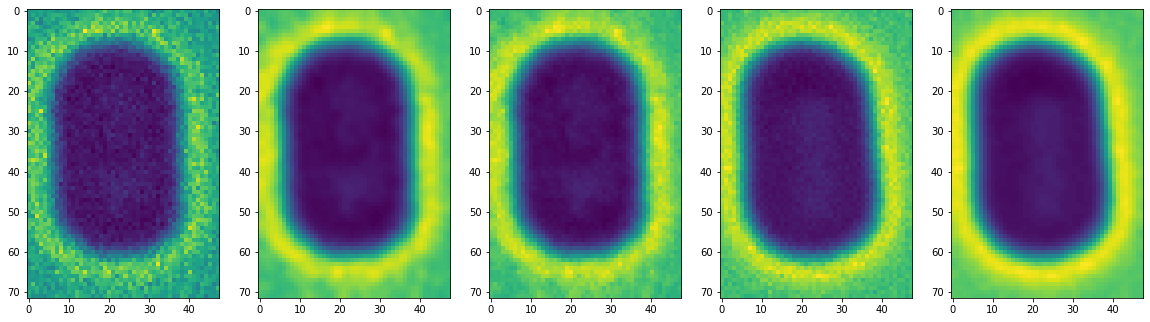

In [79]:
import albumentations as A

idx = 1

sem_img = cv2.imread(simulation_sem_paths[idx], cv2.IMREAD_GRAYSCALE)
blur_img = A.GaussianBlur(blur_limit=7, always_apply=True)(image=sem_img)['image']

rate = 0.2
sum_img = sem_img*rate + blur_img*(1-rate)

train_img = cv2.imread(train_sem_paths[idx], cv2.IMREAD_GRAYSCALE)
train_blur_img = A.GaussianBlur(blur_limit=3, always_apply=True)(image=train_img)['image']



plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.imshow(sem_img)
plt.subplot(1, 5, 2)
plt.imshow(blur_img)
plt.subplot(1, 5, 3)
plt.imshow(sum_img)
plt.subplot(1, 5, 4)
plt.imshow(train_img)
plt.subplot(1, 5, 5)
plt.imshow(train_blur_img)

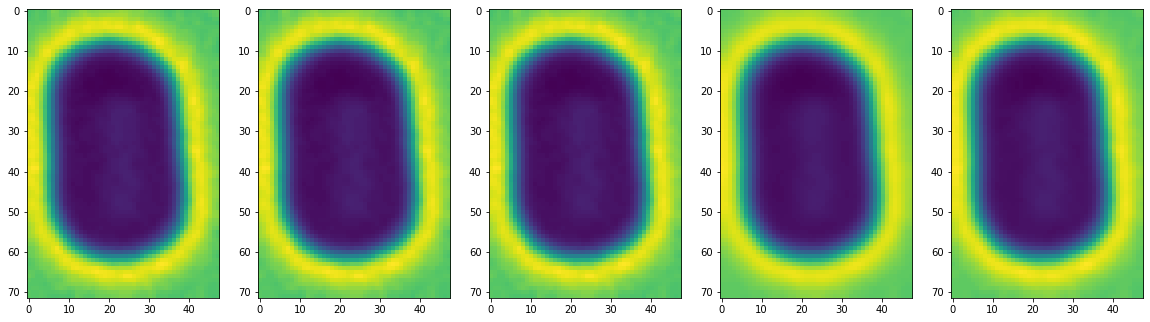

In [81]:
import albumentations as A

idx = 1

train_blur_img1 = A.GaussianBlur(blur_limit=3, always_apply=True)(image=train_img)['image']
train_blur_img2 = A.GaussianBlur(blur_limit=5, always_apply=True)(image=train_img)['image']
train_blur_img3 = A.GaussianBlur(blur_limit=7, always_apply=True)(image=train_img)['image']
train_blur_img4 = A.GaussianBlur(blur_limit=9, always_apply=True)(image=train_img)['image']
train_blur_img5 = A.GaussianBlur(blur_limit=11, always_apply=True)(image=train_img)['image']



plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.imshow(train_blur_img1)
plt.subplot(1, 5, 2)
plt.imshow(train_blur_img2)
plt.subplot(1, 5, 3)
plt.imshow(train_blur_img3)
plt.subplot(1, 5, 4)
plt.imshow(train_blur_img4)
plt.subplot(1, 5, 5)
plt.imshow(train_blur_img5)

## Normalization

In [18]:
def analyze_data(sem_path, depth_path=None):
    sem_img = cv2.imread(sem_path, cv2.IMREAD_GRAYSCALE)

    # print(sem_img)
    print(f'SEM mean = {np.mean(sem_img)}')
    print(f'SEM std = {np.std(sem_img)}')

    if depth_path is not None:
        depth_img = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)

        print(f'depth mean = {np.mean(depth_img)}')
        print(f'depth std = {np.std(depth_img)}')

        plt.subplot(1, 2, 1)
        plt.imshow(sem_img)
        plt.subplot(1, 2, 2)
        plt.imshow(depth_img)
    else:
        plt.imshow(sem_img)
    plt.title(sem_path)

[[138 140 120 ... 130 122 108]
 [124 136 110 ... 127 119 141]
 [130 129 137 ... 132 115 135]
 ...
 [132 142 132 ... 120 116 124]
 [130 118 136 ... 135 128 112]
 [153 129 133 ... 135 116 133]]
SEM mean = 100.92621527777777
SEM std = 54.03807970431205
depth mean = 102.18315972222223
depth std = 45.77351860799972


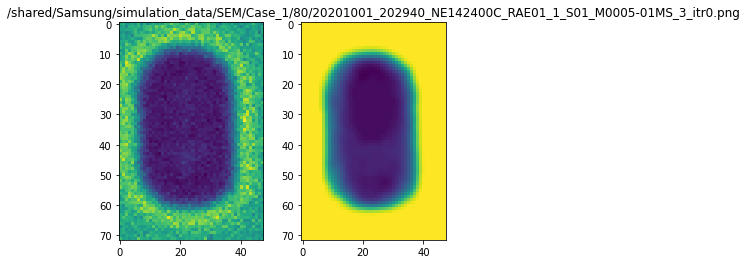

In [19]:
analyze_data(simulation_sem_paths[0], simulation_depth_paths[0])

(array([[138, 140, 120, ..., 130, 122, 108],
        [124, 136, 110, ..., 127, 119, 141],
        [130, 129, 137, ..., 132, 115, 135],
        ...,
        [132, 142, 132, ..., 120, 116, 124],
        [130, 118, 136, ..., 135, 128, 112],
        [153, 129, 133, ..., 135, 116, 133]], dtype=uint8),
 100.92621527777777,
 54.03807970431205)

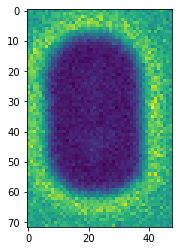

In [15]:
sample_simul_sem = cv2.imread(simulation_sem_paths[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_simul_sem)
sample_simul_sem, np.mean(sample_simul_sem), np.std(sample_simul_sem)

(array([[161, 156, 154, ..., 147, 155, 149],
        [161, 151, 149, ..., 155, 144, 152],
        [150, 156, 159, ..., 157, 152, 153],
        ...,
        [157, 145, 157, ..., 152, 145, 157],
        [149, 148, 142, ..., 164, 152, 153],
        [158, 149, 148, ..., 157, 143, 150]], dtype=uint8),
 '/shared/Samsung/train/SEM/Depth_110/site_00000/SEM_043510.png')

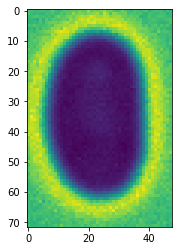

In [13]:
sample_simul_sem = cv2.imread(train_sem_paths[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_simul_sem)
sample_simul_sem, train_sem_paths[0]

In [7]:
simul_ds = SEMDataset(simulation_sem_paths, simulation_depth_paths)
len(simul_ds)

173304

In [8]:
train_ds = SEMDataset(train_sem_paths)
len(train_ds)

60664

In [10]:
[np.mean(sem.numpy(), axis=(1,2)) for path, sem, depth in simul_ds]

[array([0.39578912], dtype=float32),
 array([0.39042416], dtype=float32),
 array([0.41139483], dtype=float32),
 array([0.40735748], dtype=float32),
 array([0.41086033], dtype=float32),
 array([0.39057508], dtype=float32),
 array([0.38358414], dtype=float32),
 array([0.41487727], dtype=float32),
 array([0.37195334], dtype=float32),
 array([0.3924383], dtype=float32),
 array([0.39306808], dtype=float32),
 array([0.41387868], dtype=float32),
 array([0.4014139], dtype=float32),
 array([0.40581203], dtype=float32),
 array([0.4152914], dtype=float32),
 array([0.4002814], dtype=float32),
 array([0.40693763], dtype=float32),
 array([0.39911383], dtype=float32),
 array([0.40740627], dtype=float32),
 array([0.40141842], dtype=float32),
 array([0.40535024], dtype=float32),
 array([0.3961999], dtype=float32),
 array([0.40720883], dtype=float32),
 array([0.41180786], dtype=float32),
 array([0.3820023], dtype=float32),
 array([0.39103124], dtype=float32),
 array([0.37980554], dtype=float32),
 array(

In [13]:
def get_mean_std(dataset):
  mean_per_img = [np.mean(image.numpy(), axis=(1,2)) for _,image,_ in dataset]
  std_per_img = [np.std(image.numpy(), axis=(1,2)) for _,image,_ in dataset]

  mean = np.mean([m[0] for m in mean_per_img])
  std = np.mean([s[0] for s in std_per_img])

  print(mean)
  print(std)

In [14]:
get_mean_std(simul_ds)

0.3920241
0.22617114


## transform

In [119]:
from src.datasets.transform import get_transform

In [124]:
transform = get_transform([96, 64])
simul_ds = SEMDataset(simulation_sem_paths, simulation_depth_paths, transform)
len(simul_ds)

173304

In [161]:
sem_img = cv2.imread(simulation_sem_paths[0], cv2.IMREAD_GRAYSCALE) / 255.
sem_img[0] * 255

array([138., 140., 120., 124., 134., 119., 147., 112., 138., 111., 129.,
       140., 126., 136., 134., 153., 147., 169., 152., 155., 142., 138.,
       163., 146., 132., 162., 128., 139., 146., 155., 135., 143., 127.,
       104., 138., 136., 122., 137., 115., 118., 135., 117., 129., 136.,
       153., 130., 122., 108.])

In [167]:
from albumentations.pytorch import ToTensorV2
sem_tensor = ToTensorV2()(image=sem_img)['image']
sem_tensor[0][0].float() * 255

tensor([138., 140., 120., 124., 134., 119., 147., 112., 138., 111., 129., 140.,
        126., 136., 134., 153., 147., 169., 152., 155., 142., 138., 163., 146.,
        132., 162., 128., 139., 146., 155., 135., 143., 127., 104., 138., 136.,
        122., 137., 115., 118., 135., 117., 129., 136., 153., 130., 122., 108.])

In [ ]:
norm_transform = A.Compose([
        A.Normalize(mean=[0.5],std=[0.5]),
        ToTensorV2()
    ])
sem_norm = 

In [137]:
simul_ds[0][1]

tensor([[[0.5412, 0.5461, 0.5196,  ..., 0.4902, 0.4578, 0.4235],
         [0.5069, 0.5271, 0.5043,  ..., 0.4828, 0.4836, 0.5044],
         [0.4951, 0.5126, 0.5036,  ..., 0.4775, 0.4920, 0.5441],
         ...,
         [0.5127, 0.5036, 0.5091,  ..., 0.4930, 0.4740, 0.4569],
         [0.5436, 0.5032, 0.4977,  ..., 0.5012, 0.4790, 0.4701],
         [0.6000, 0.5412, 0.5118,  ..., 0.4828, 0.4799, 0.5216]]])